### Step1: # Importing all required packages


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

#ading a constant varibale
import statsmodels.api as sm

%matplotlib inline

### Step2: Reading Dataset and Understanding Data


In [3]:
bikes = pd.read_csv('C:\\Users\\adminuser\\Desktop\\upgrad\\day.csv')

In [4]:
# Let's explore the top 5 rows

bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#check the shape
bikes.shape

(730, 16)

In [6]:
##check dataframe for null and datatype 
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bikes.size


11680

In [ ]:
###Step3 Drop columns that are not useful for analysis

instant is a row identifier and can be removed
dteday is removed as we have some of date features like mnth and year and weekday already in other columns 

In [9]:
bikes['days_old'] = (pd.to_datetime(bikes['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days


In [10]:
# Droping instant column as it is index column which has nothing to do with target
bikes.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikes.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikes.drop(['casual'], axis = 1, inplace = True)
bikes.drop(['registered'], axis = 1, inplace = True)

In [11]:
#Inspect data frame after dropping
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [13]:
bikes.corr()



,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.


In [15]:
#Handle Missing values
    

In [16]:
#Print null counts by column
bikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

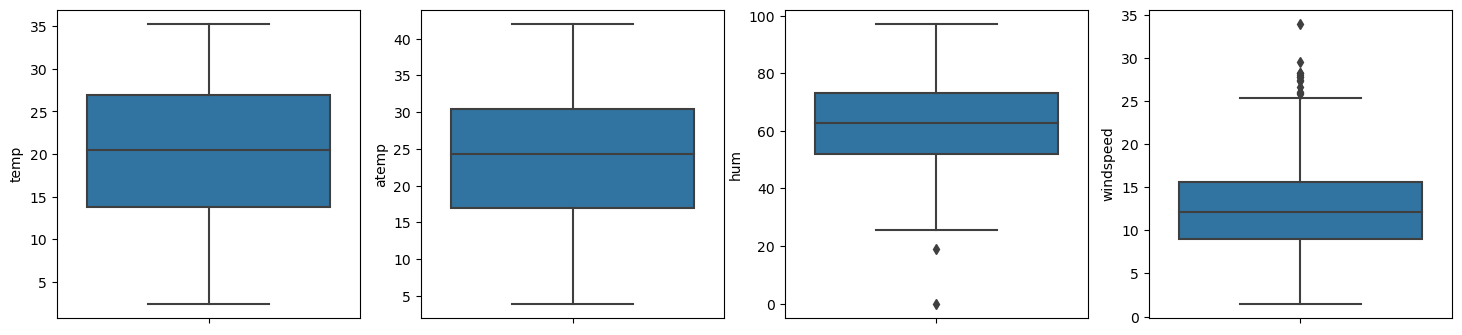

In [18]:
### Handle Outliers
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikes)
    i+=1

In [ ]:
#no outliers observedb

## Step 4  EDA

In [ ]:
#Convert season and weathersit to categorical types

In [19]:
bikes['season']=bikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikes['weathersit']=bikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})
bikes.mnth = bikes.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bikes.weekday = bikes.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


In [ ]:
## Step 4.  Draw pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

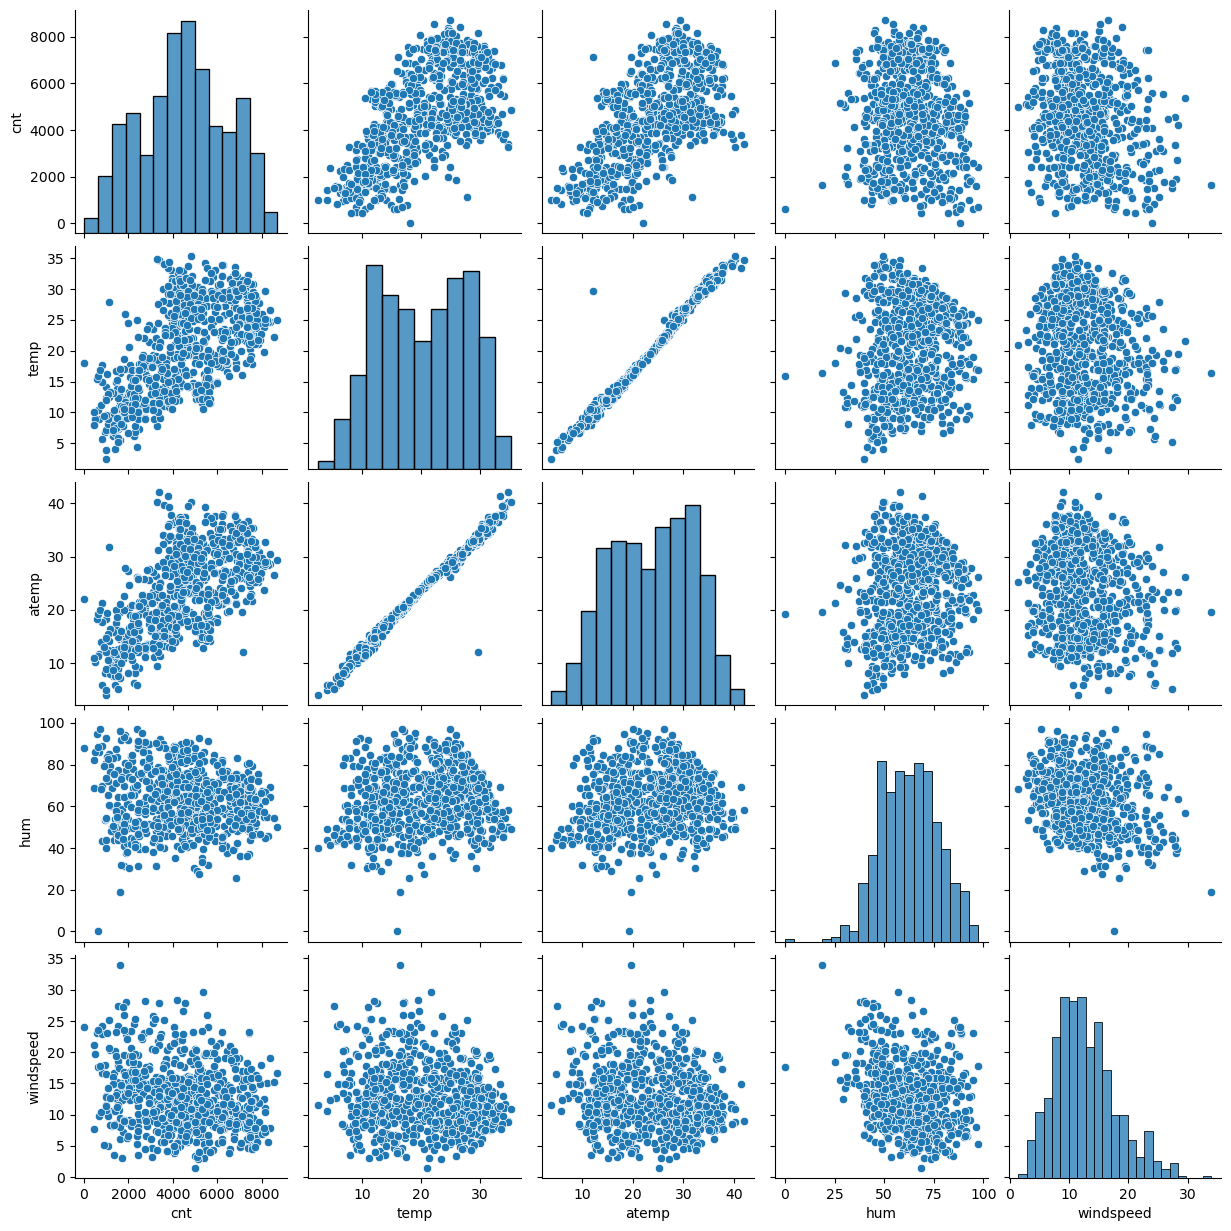

In [20]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikes,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [ ]:
4.3 Visualising the Data to Find the Correlation between the Numerical Variable


<Figure size 2000x1500 with 0 Axes>

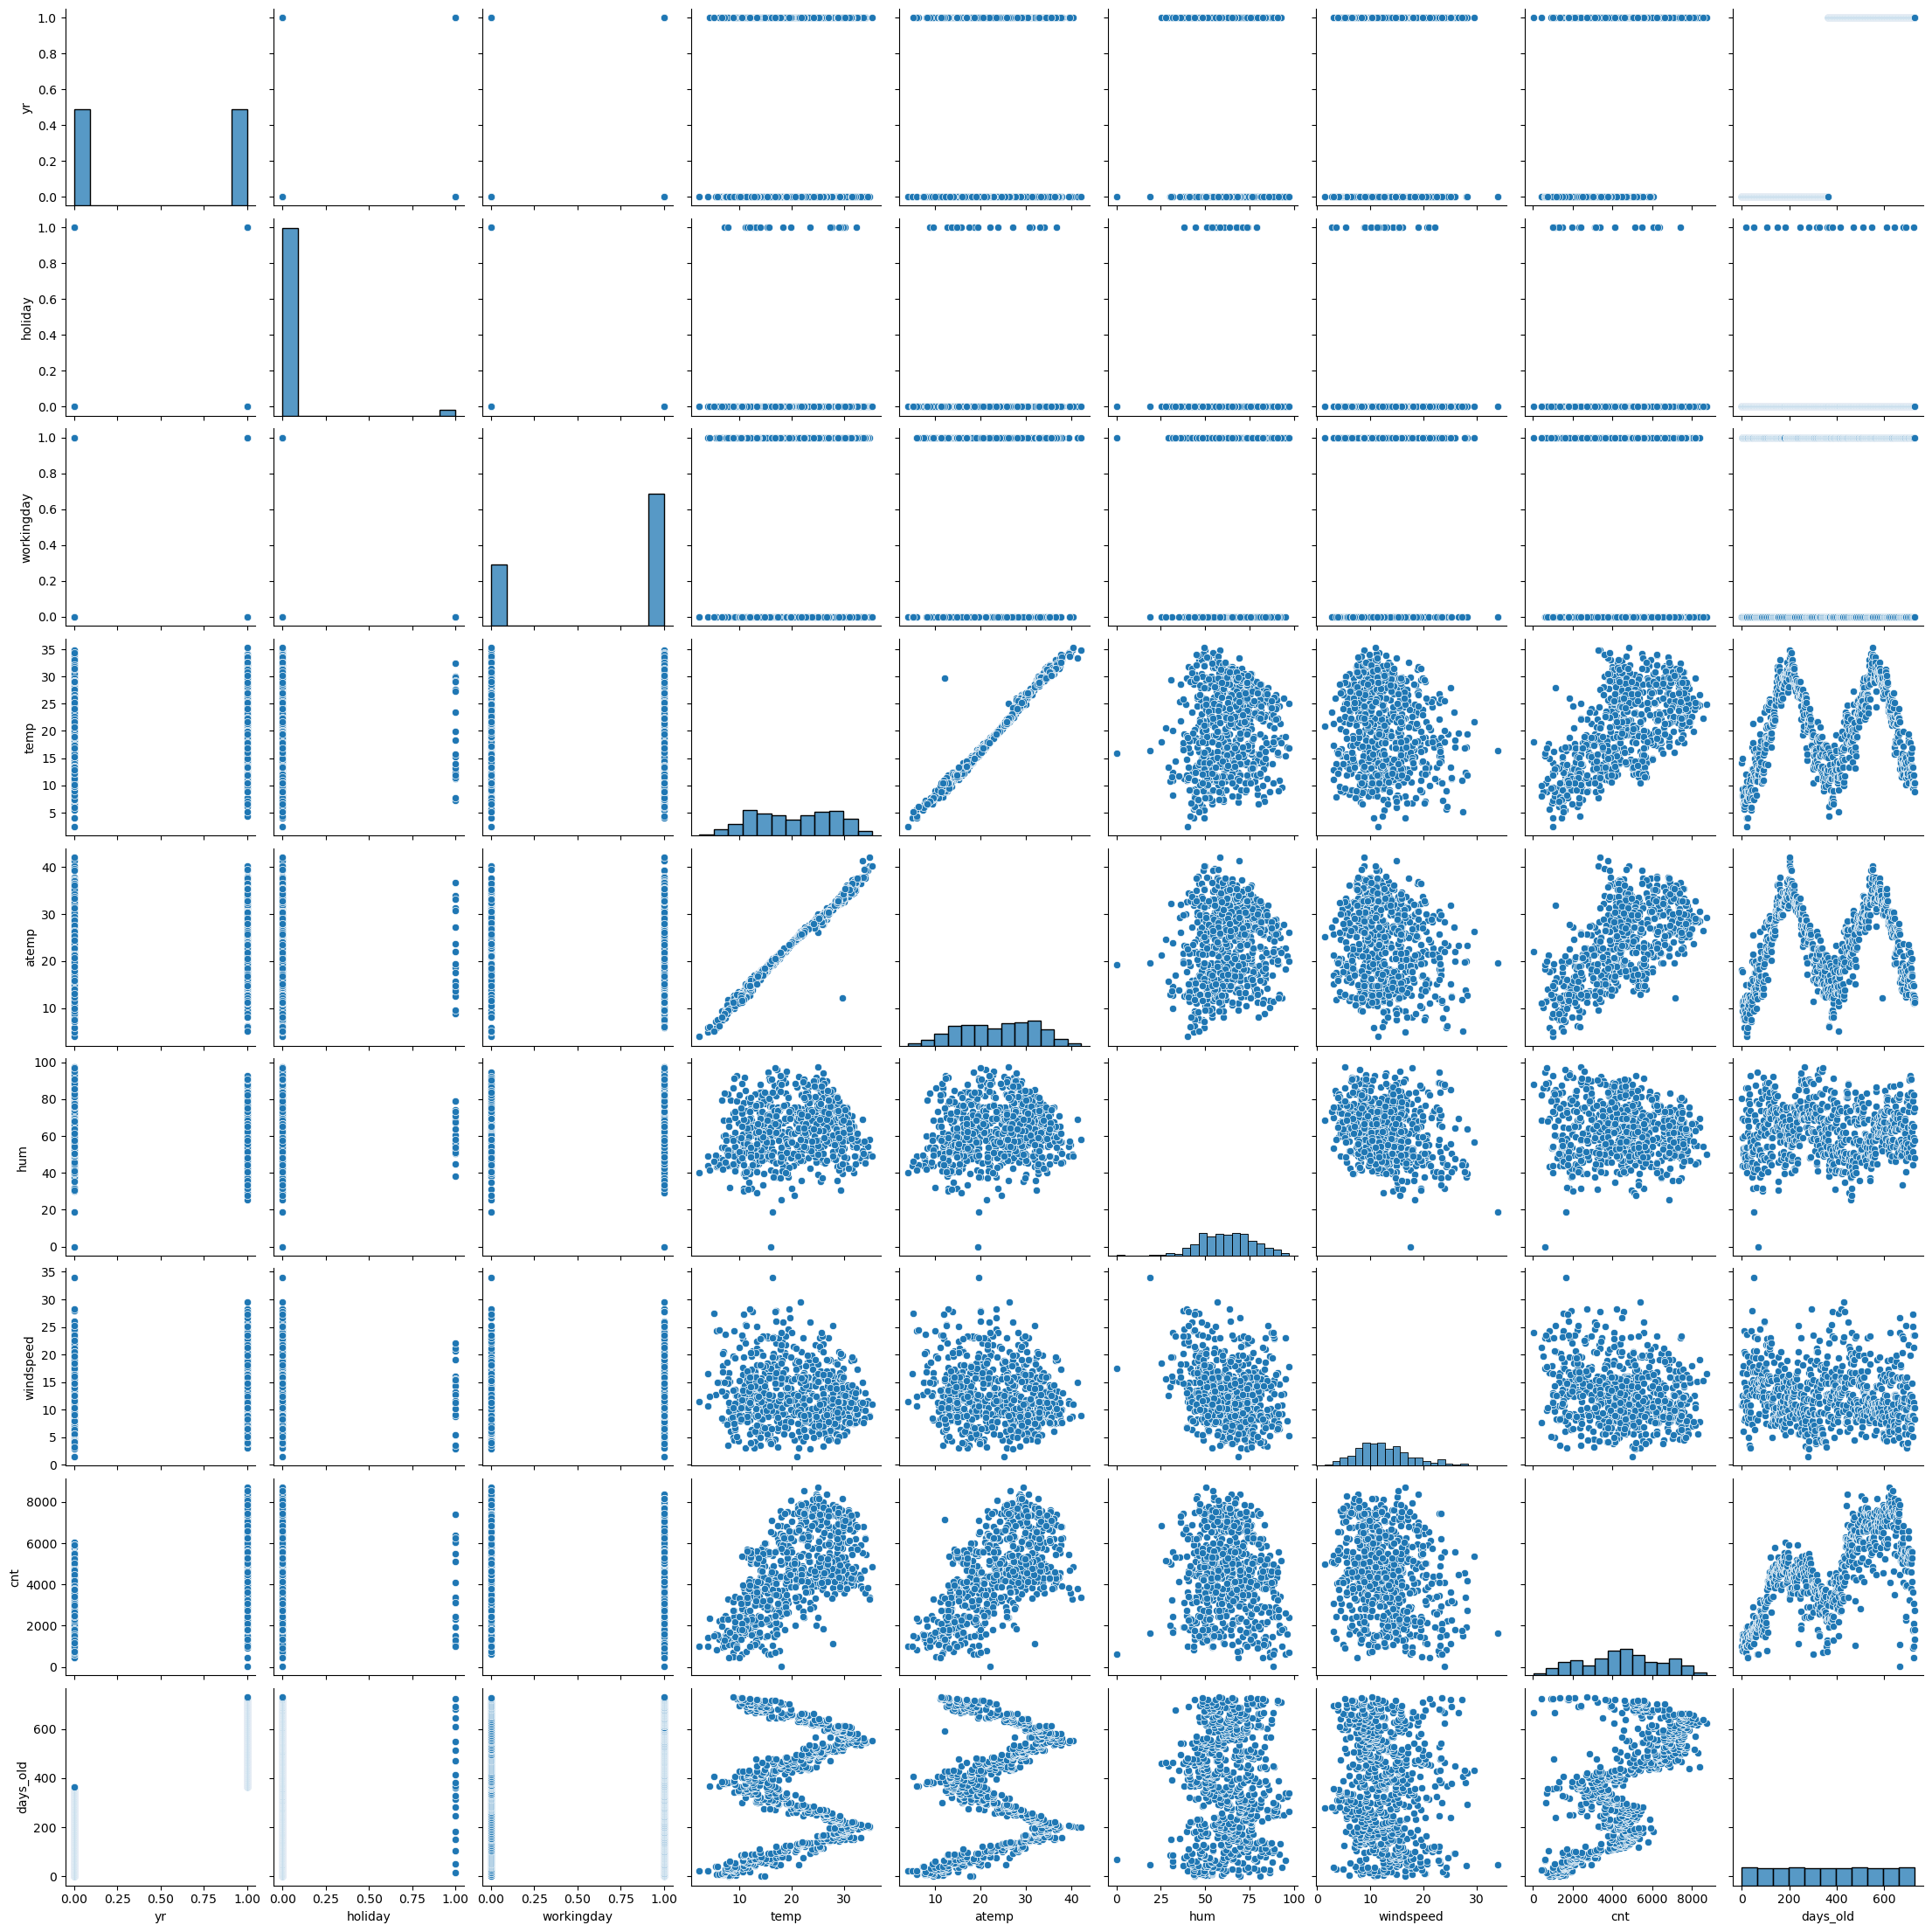

In [21]:
plt.figure(figsize=(20,15))
sns.pairplot(bikes)
plt.show()

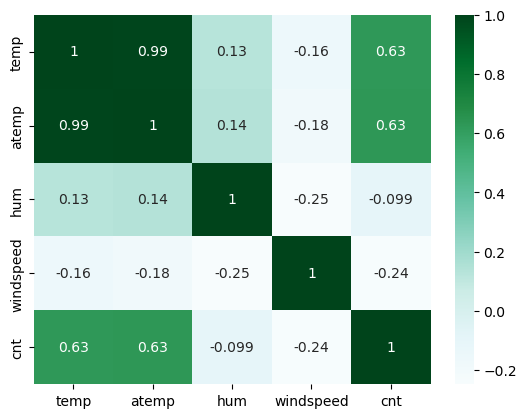

In [23]:
# Checking continuous variables relationship with each other
sns.heatmap(bikes[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [ ]:
temp and atemp are highly corelated but atemp is derived from temp and can be dropped

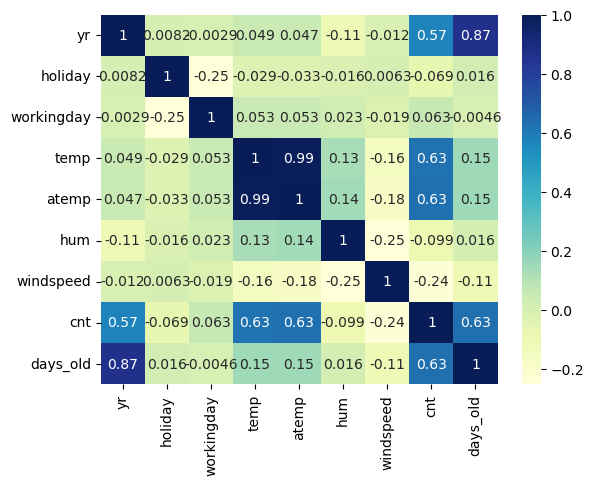

In [24]:
#Correlations for numeric variables
cor=bikes.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
4.4 Draw Heatmap of correlation between variables


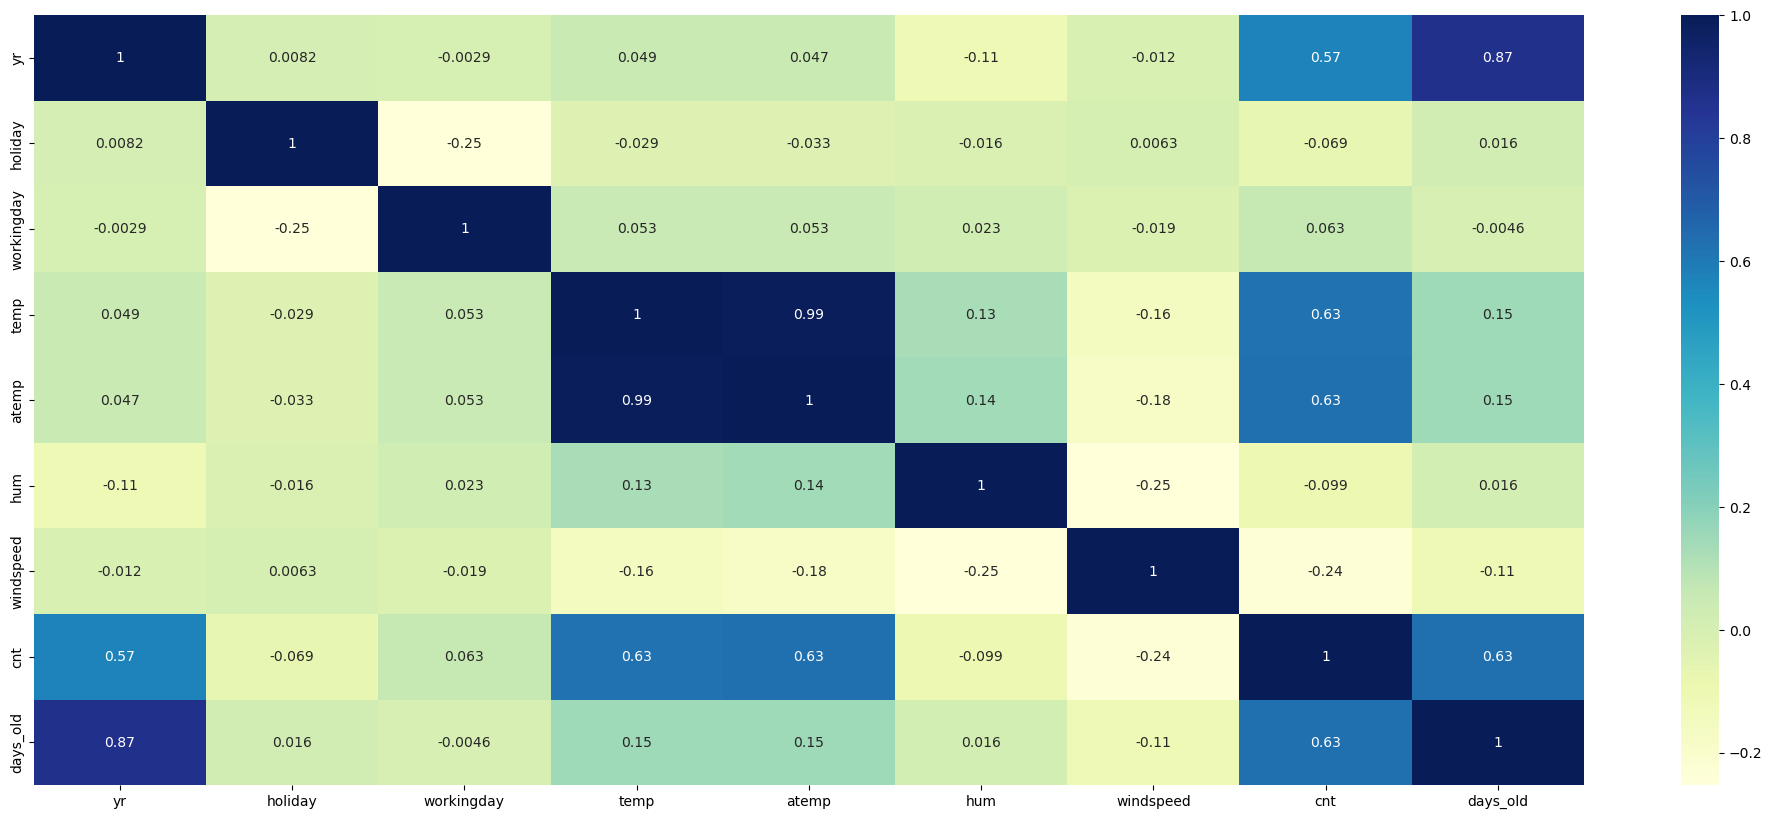

In [25]:
#Calculate Correlation
corr = bikes.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

In [ ]:
#map, temp, atemp and days_old are highly correlated

In [ ]:
4.5 Analysing Categorical Variabels with target variables


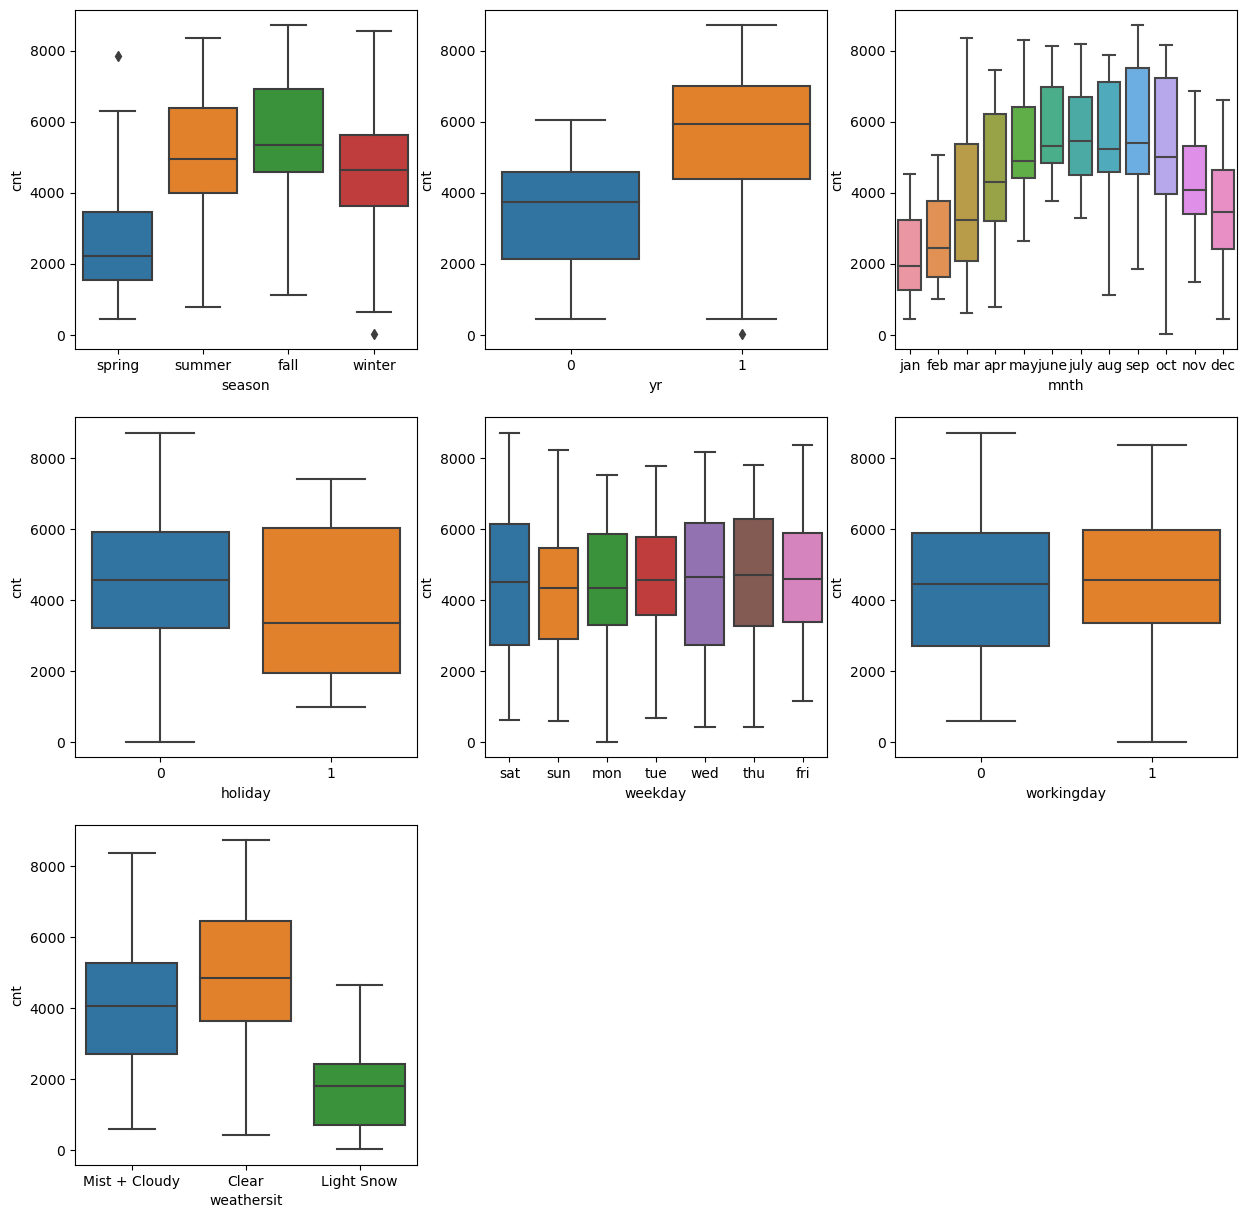

In [27]:
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikes, x=i[1], y='cnt')
plt.show()

In [ ]:
#high demand i summur and fall
#demand increased during holiday

# 5. Data Preparation for Linear Regression


In [ ]:
#5.1 Create dummy variables for all categorical variables


In [29]:
bikes = pd.get_dummies(data=bikes,columns=["season","mnth","weekday"],drop_first=True)
bikes = pd.get_dummies(data=bikes,columns=["weathersit"])

In [31]:
bikes.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Clear',
       'weathersit_Light Snow', 'weathersit_Mist + Cloudy'],
      dtype='object')

In [ ]:
6. Model Building


In [33]:
bikes.shape

(730, 32)

In [34]:
#y to contain only target variable
y=bikes.pop('cnt')

#X is all remainign variable also our independent variables
X=bikes

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


In [ ]:
#5.2 Feature Scaling continuous variables


In [38]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [39]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light Snow,weathersit_Mist + Cloudy
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.624266,0.029354,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.484786,0.168963,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light Snow,weathersit_Mist + Cloudy
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,1,0,0,0,0,0,1,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
#5.3 Build a Model using RFE and Automated approach


In [41]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
#Cut down number of features to 15 using automated approach
#rfe = RFE(lr,15)
rfe = RFE(lr, n_features_to_select=15) 
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [44]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', False, 3),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 6),
 ('mnth_feb', False, 13),
 ('mnth_jan', False, 9),
 ('mnth_july', False, 15),
 ('mnth_june', False, 10),
 ('mnth_mar', False, 4),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 7),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 16),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [ ]:
5.4 Manual elimination


In [45]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [46]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [47]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [49]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']]

In [50]:
X_train_rfe.shape


(511, 15)

In [ ]:
6. Build Model


In [52]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          6.89e-186
Time:                        16:01:41   Log-Likelihood:                -4129.9
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

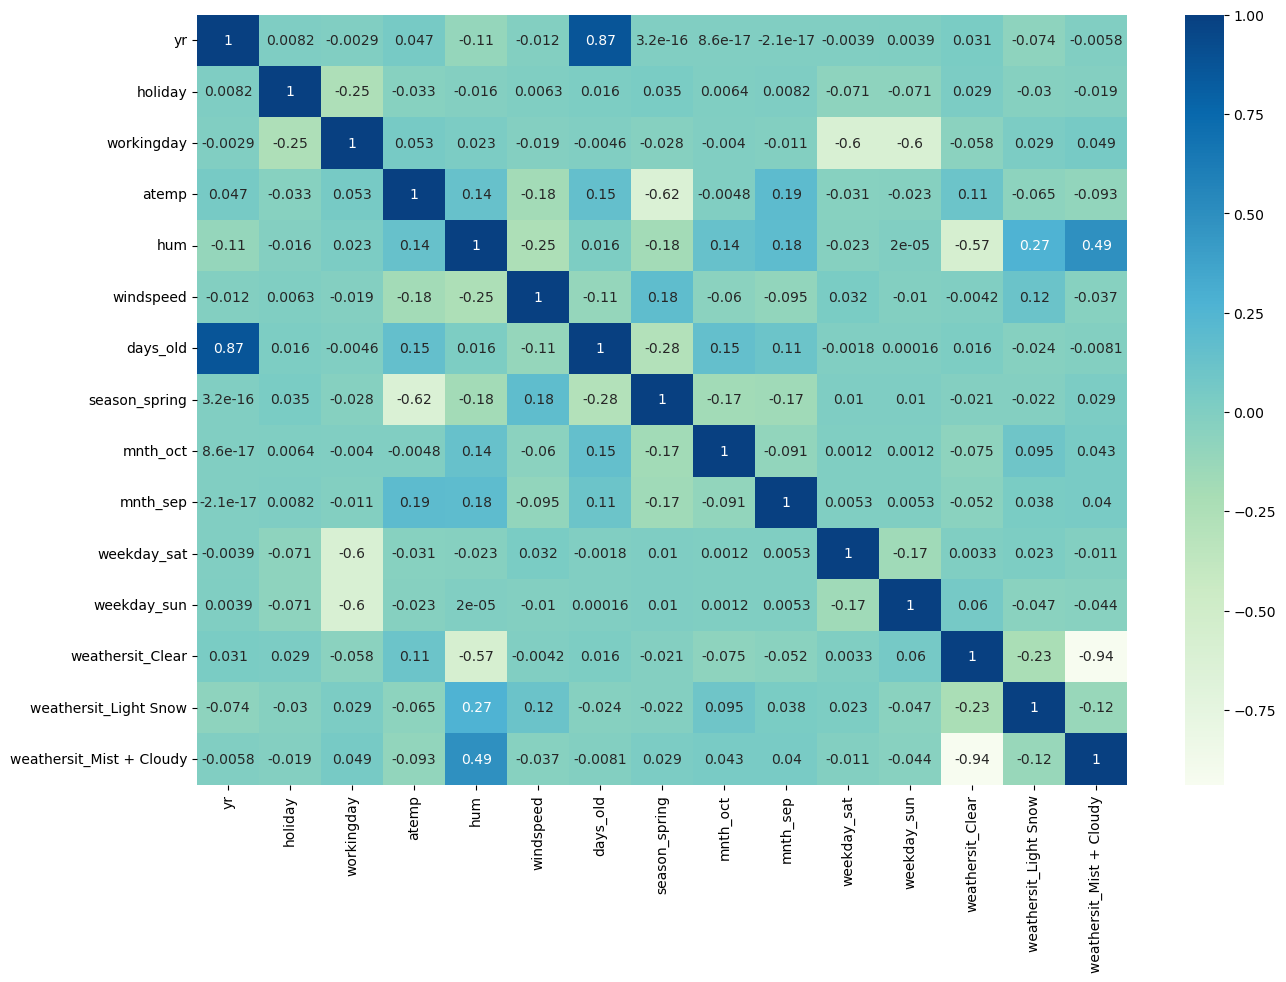

In [54]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikes[['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']].corr(), cmap='GnBu', annot=True)
plt.show()

In [ ]:
#model2

In [62]:
#Selected columns for Model 2 - drop holidy
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sep', 'weekday_sat', 'weekday_sun',
       'weathersit_Clear', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          6.89e-186
Time:                        16:14:03   Log-Likelihood:                -4129.9
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
#model 3

In [63]:
#Selected columns for Model 2 - drop weathersit_Clear - high vif
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sep', 'weekday_sat', 'weekday_sun',
        'weathersit_Light Snow',
       'weathersit_Mist + Cloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          6.89e-186
Time:                        16:17:53   Log-Likelihood:                -4129.9
No. Observations:                 511   AIC:                             8288.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [ ]:
#model 4

In [64]:
#Selected columns for Model 4 - drop weathersit_Mist + Cloudy - negative coeffifient with less value
cols = ['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sep', 'weekday_sat', 'weekday_sun',
        'weathersit_Light Snow'
       ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.0
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          1.17e-181
Time:                        16:20:35   Log-Likelihood:                -4142.7
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     498   BIC:                             8366.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3476.70

In [65]:
#Selected columns for Model 5 - drop working day -  less value
cols = ['yr', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'mnth_oct', 'mnth_sep', 'weekday_sat', 'weekday_sun',
        'weathersit_Light Snow'
       ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.4
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          1.06e-180
Time:                        16:23:11   Log-Likelihood:                -4147.7
No. Observations:                 511   AIC:                             8319.
Df Residuals:                     499   BIC:                             8370.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4151.61

In [66]:
#Selected columns for Model 6 - drop dayold -  less value
cols = ['yr', 'atemp', 'hum', 'windspeed', 
       'season_spring', 'mnth_oct', 'mnth_sep', 'weekday_sat', 'weekday_sun',
        'weathersit_Light Snow'
       ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.6
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          2.77e-181
Time:                        16:24:11   Log-Likelihood:                -4149.2
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     500   BIC:                             8367.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3945.85

In [67]:
#Selected columns for Model 7 - drop weekday_sat -  less value
cols = ['yr', 'atemp', 'hum', 'windspeed', 
       'season_spring', 'mnth_oct', 'mnth_sep',  'weekday_sun',
        'weathersit_Light Snow'
       ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     260.0
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          1.88e-182
Time:                        16:25:06   Log-Likelihood:                -4149.3
No. Observations:                 511   AIC:                             8319.
Df Residuals:                     501   BIC:                             8361.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3958.43

In [68]:
#Selected columns for Model 8 - drop hum -  high vif
cols = ['yr', 'atemp', 'windspeed', 
       'season_spring', 'mnth_oct', 'mnth_sep',  'weekday_sun',
        'weathersit_Light Snow'
       ]
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     250.2
Date:                Mon, 19 Dec 2022   Prob (F-statistic):          9.68e-170
Time:                        16:27:37   Log-Likelihood:                -4182.1
No. Observations:                 511   AIC:                             8382.
Df Residuals:                     502   BIC:                             8420.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2317.50

In [ ]:
#VIP is in the acceptable range. So  Model 9 is the selected asfinal model

In [71]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [72]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'atemp', 'windspeed', 
       'season_spring', 'mnth_oct', 'mnth_sep',  'weekday_sun',
        'weathersit_Light Snow']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

2317.503004179809 [ 1981.80143428  3400.52632509  -668.14104673 -1377.67767607
   679.73651221   616.76879224  -323.3216065  -1997.81718687]


In [ ]:
#Step 7. Model Evaluation


In [73]:
y_train_pred = lr.predict(X_train[cols])


In [74]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

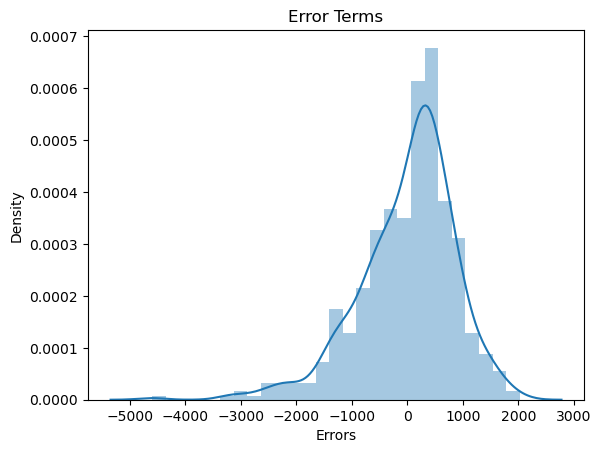

In [75]:
plot_res_dist(y_train, y_train_pred)


In [ ]:
#Errors are normally distribured here with mean 0. So everything seems to be fine


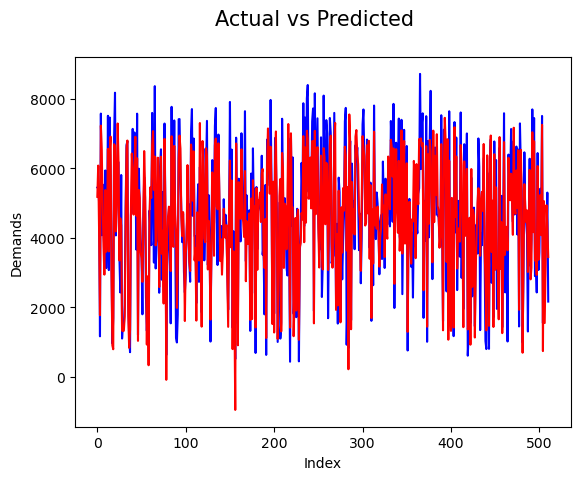

In [76]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [ ]:
#Actual and Predicted result following almost the same pattern so this model seems ok


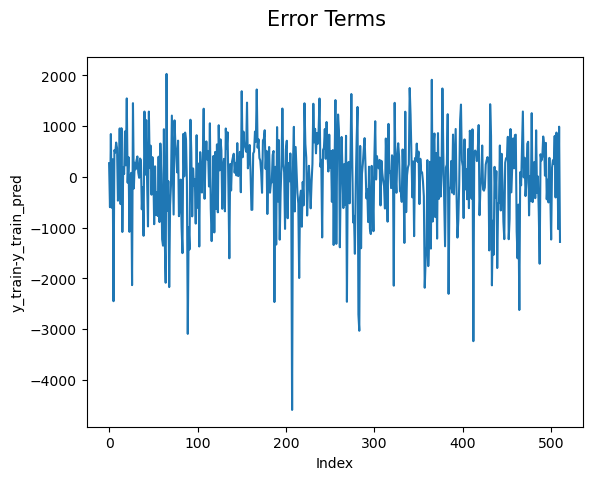

In [77]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [ ]:
#Here,If we see the error terms are independent of each other.


In [78]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.7994736219329923

In [ ]:
#R2 Same as we obtained for our final model



In [ ]:
7.2 Linearity Check


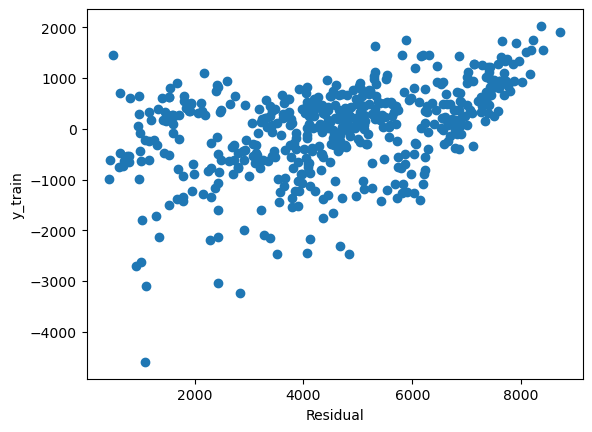

In [79]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [ ]:
7.3 Predict values for test data set


In [84]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [86]:
#Columns from our final model
cols = ['yr', 'atemp', 'windspeed', 
       'season_spring', 'mnth_oct', 'mnth_sep',  'weekday_sun',
        'weathersit_Light Snow']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

In [87]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

-0.34546667113824214